## Imports

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Pauli
from qiskit_aer.primitives import Estimator
from qiskit.quantum_info import Statevector

## Useful definitions

In [2]:
estimator = Estimator()

X = Pauli('X')
Y = Pauli('Y')
Z = Pauli('Z')

In [3]:
def printStatevector(sv, significativeDigits=2, nbQubits=1):
    """
    for 1 qubit :
    sv is in the form [a+bj, c+dj]

    prints (a+bi)|0> + (c+di)|1>
    """
    n = 2**nbQubits
    for i in range(n):
        print(f"({round(sv[i].real, significativeDigits)}+{round(sv[i].imag, significativeDigits)}i)|{bin(i)[2:].zfill(nbQubits)}>")

In [4]:
printStatevector([1, 0, 0, 0], 2, 2)

(1+0i)|00>
(0+0i)|01>
(0+0i)|10>
(0+0i)|11>


## Basic circuit

that circuit gives $|+\rangle$

In [5]:
qc = QuantumCircuit(1)
qc.h(0) 

## Display

Method 1 :

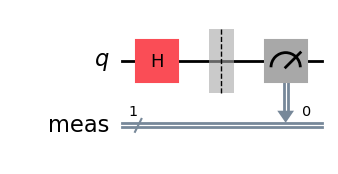

In [6]:
qc2 = QuantumCircuit(1)
qc2.h(0) 

qc2.measure_all()  

qc2.draw("mpl") 

Method 2 :

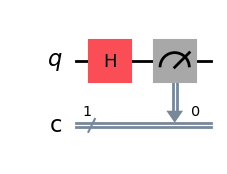

In [7]:
qc3 = QuantumCircuit(1, 1)
qc3.h(0)

qc3.measure(0, 0)

qc3.draw("mpl")

## Measure

average :

In [8]:
job = estimator.run([qc], [Z])

result = job.result().values[0]

print("Average Measurement Result:", result)

Average Measurement Result: 0.03125


single measurement :

In [9]:
job = estimator.run([qc], [Z], shots=1)

result = job.result().values[0]

print("Single Measurement Result:", result)

Single Measurement Result: 1.0


In [10]:
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)

## "Cheat" and get the statevector

In [11]:
statevector = Statevector.from_instruction(qc)
print("Quantum State:", statevector.data)

Quantum State: [ 0.70710678+0.j -0.70710678+0.j]


In [12]:
printStatevector(statevector.data)

(0.71+0.0i)|0>
(-0.71+0.0i)|1>


## Multiple qubits

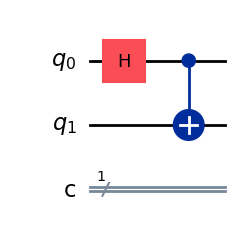

In [13]:
qc = QuantumCircuit(2, 1)
qc.h(0)
qc.cx(0, 1)

qc.draw("mpl")

Bell state :

In [14]:
sv = Statevector.from_instruction(qc)
printStatevector(sv.data, nbQubits=2)

(0.71+0.0i)|00>
(0.0+0.0i)|01>
(0.0+0.0i)|10>
(0.71+0.0i)|11>
